# Single Kramers chain with excluded volume (EV) and hydrodynamic interactions (HI)

## Excluded volume

Let's start from the SDE for the beads:
\begin{equation}
\mathrm{d}X_i =\left(X_i\nabla U + \frac{g_i}{\zeta\ell} Q_i - \frac{g_{i-1}}{\zeta\ell}Q_{i-1} + \frac{1}{\zeta}\sum_{j\neq i} F(X_i-X_j)\right)\mathrm{d}t + \mathrm{d}W_i
\end{equation}

with $F(X_j-X_i)$ (typically short-range) forces. Many options are possible but the idea is to reproduce the statistics of chains in real (good or bad) solvents.

## Hydrodynamic interactions

To account for hydrodynamic interactions, we need to consider the coupled mobility of the beads:
\begin{equation}
\mathrm{d}X_i =\left(X_i\nabla U + \sum_{j\neq i}G_{ij}\left(\frac{g_j}{\ell_j} Q_j - \frac{g_{j-1}}{\ell_{j-1}}Q_{j-1}\right) + \frac{g_i}{\zeta_i\ell_i} Q_i - \frac{g_{i-1}}{\zeta_{i}\ell_{i-1}}Q_{i-1} \right)\mathrm{d}t + \mathrm{d}W_i
\end{equation}

where $G_{ij}$ is the Stokeslet tensor giving velocity field at point $i$ given a force at point $j$. The stochastic motion is now correlated through the variance of $\mathrm{d}W_i$ which is $2kTG_{ij}\mathrm{d}t$. A More usual way to write it is to use the mobility matrix $M$:

\begin{equation}
\mathrm{d}X_i =\left(X_i\nabla U + \sum M_{ij}\left(\frac{g_j}{\ell_j} Q_j - \frac{g_{j-1}}{\ell_{j-1}}Q_{j-1}\right)  \right)\mathrm{d}t + \mathrm{d}W_i
\end{equation}

where $M_{ii}=I/\zeta_i$. For the rods, we have:

\begin{equation}
\mathrm{d}Q_i =\left(Q_i\nabla U + \sum \left(M_{i+1,j}-M_{ij}\right)\left(\frac{g_j}{\ell_j} Q_j - \frac{g_{j-1}}{\ell_{j-1}}Q_{j-1}\right)  \right)\mathrm{d}t + \mathrm{d}W_{i+1} - \mathrm{d}W_{i}
\end{equation}

Which is conveniently written as:

\begin{equation}
\mathrm{d}Q_i =\left(Q_i\nabla U + \sum_{j=0}^{N-1} \left(M_{i+1,j} + M_{i,j+1}-M_{ij}-M_{i+1,j+1}\right)\frac{g_j}{\ell_j} Q_j  \right)\mathrm{d}t + \mathrm{d}W_{i+1} - \mathrm{d}W_{i}
\end{equation}

### Rotne-Prager-Yamakawa hydrodynamic tensor

If the bead has a radius $a$, for $i\neq j$ and $r_{ij}>2a$

\begin{equation}
M_{ij} = \frac{1}{8\pi \eta r_{ij}}\left( \left(I - \frac{R_{ij}R_{ij}}{r_{ij}^2}\right) 
+ \frac{2a^2}{3r_{ij}^2}\left(I - 3\frac{R_{ij}R_{ij}}{r_{ij}^2}\right) \right)
\end{equation}

For $i\neq j$ and $r_{ij}<2a$

\begin{equation}
M_{ij} = \frac{1}{6\pi \eta a}\left( \left(1 - \frac{9r_{ij}}{32a}\right)I
+ \frac{3}{32ar_{ij}}R_{ij}R_{ij} \right)
\end{equation}

Let's now look at the dimensionless form. In the normalisation process we have been following so far, $M$ would be multiplied by $\zeta$, the friction of a unit bead. In the literature, it is common to expand $\zeta$ in $\zeta=6\pi a \eta$, so that in dimensionless form:

\begin{equation}
M_{ij}^+ =6\pi a \eta M_{ij}= \frac{3 a^+}{4 r_{ij}^+}\left( \left(I - \frac{R_{ij}^+R_{ij}^+}{r_{ij}^{+2}}\right) 
+ \frac{2a^{+2}}{3r_{ij}^{+2}}\left(I - 3\frac{R_{ij}^+R_{ij}^+}{r_{ij}^{+2}}\right) \right)
\end{equation}

where the bead radius has been normalised by the rod length: $a^+=a/\ell$. It is even more common to express $a^+$ as
$$
h^*=\frac{a^+}{\sqrt{\pi}}
$$
with $h^*$ the strength of hydrodynamic interactions. 

## Puting it all together

Now we combine that with excluded volume forces (or more general potential force) $F_i$

\begin{equation}
\mathrm{d}X_i =\left(X_i\nabla U + \sum_{j\neq i}G_{ij}\left(\frac{g_j}{\ell_j} Q_j - \frac{g_{j-1}}{\ell_{j-1}}Q_{j-1} + F_j\right) + \frac{g_i}{\zeta_i\ell_i} Q_i - \frac{g_{i-1}}{\zeta_{i}\ell_{i-1}}Q_{i-1} + \frac{F_i}{\zeta_i} \right)\mathrm{d}t + \mathrm{d}W_i
\end{equation}

In dimensionless form:

\begin{equation}
\mathrm{d}Q_i =\left(Q_i\nabla U + \sum_{j=0}^{N-1} \left(M_{i+1,j} + M_{i,j+1}-M_{ij}-M_{i+1,j+1}\right)\frac{g_j}{\ell_j} Q_j + \sum_{j=0}^{N-1} \left(M_{i+1,j} - M_{i,j}\right)F_j \right)\mathrm{d}t + \mathrm{d}W_{i+1} - \mathrm{d}W_{i}
\end{equation}

In [1]:
import numpy as np
from dilutebrowniandynamics.simulate import simulate
from dilutebrowniandynamics.molecules.Kramers_chain_EVHI import KramersChainEVHI
np.random.seed(2022)

## Parameters definition

In [2]:
n_links = 20       # Number of segments in the Kramers chain

dt = .001           # Time step value (dimensionless)
n_proc = 16         # Number of processor cores to use

output_file = 'outputs/sandpit'

## Initialise molecules
Here we just draw random vectors from a normal distribution and rescale to unit vectors. To do this with call `from_normal_distribution` constructor. For now we set `h_star` to zero because we first to a relaxation step.

In [3]:
# Starting vectors
molecule = KramersChainEVHI.from_normal_distribution(n_links, h_star=0.)

We can plot this molecule using matplotlib 3d capabilities: firt we need to convert links to coordinates.

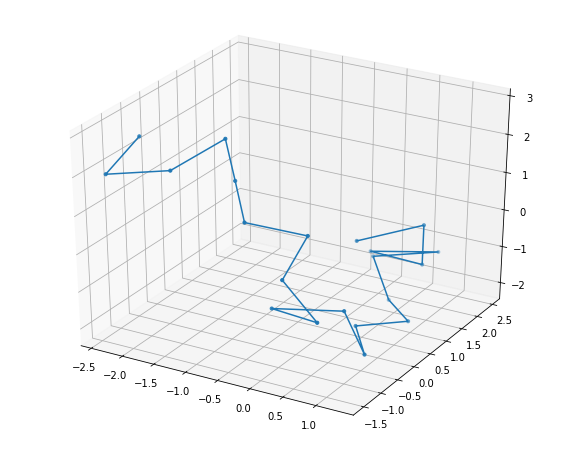

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xyz = molecule.coordinates
x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
ax.plot(x, y, z)
ax.scatter(x, y, z, s=10)

Or we can export the molecule to vtk format which can be read by Paraview.

In [5]:
molecule.save_vtk('outputs/vtk/example.vtk')

## Initial relaxation
Thermalisation step.

In [6]:
n_rec = 100       # Number of time steps to record
gradU = np.zeros((3, 3))
observables, trajectory = simulate(molecule, gradU, n_rec, dt, full_trajectory=True, progress=True)

100%|██████████| 100/100 [00:00<00:00, 208.62it/s]


In [7]:
for i in range(0,len(trajectory),1):
    trajectory[i].save_vtk(f'outputs/vtk/time_{i}.vtk')

## Simulation
Now let's simulate a sudden uniaxial elongation followed by relaxation. We first define a callable `gradU` function for this scenario.

In [8]:
from scipy.interpolate import interp1d
t_base = [0, # Elongation starts at t = 0
          5] # Relaxation will start from t = 5
gradU_base = [np.diag([1, -.5, -.5]),
              np.zeros((3, 3))]
gradU = interp1d(t_base, gradU_base, axis=0, kind='previous', bounds_error=False, 
                 fill_value=(gradU_base[0], gradU_base[-1]), assume_sorted=True)

In [9]:
n_rec = 10_000
observables, trajectory = simulate(molecule_out, gradU, n_rec, dt, full_trajectory=True, progress=True)

NameError: name 'molecule_out' is not defined

## Analysing tensions in the molecule
Save a sequence of vtk files to make an animation in Paraview:

In [ ]:
for i in range(0,len(trajectory),100):
    trajectory[i].save_vtk(f'outputs/vtk/time_{i}.vtk')

To see how the molecule unravels, we can plot tension as function of time in a 2d plot:

In [ ]:
mat = np.empty((n_rec,n_links))
for i in range(n_rec):
    mat[i] = trajectory[i].tensions
    
plt.matshow(np.log(abs(mat)), aspect=0.1)

In [ ]:
molecule_out = trajectory[-1]
%load_ext line_profiler

%lprun -f KramersChainEVHI.solve molecule_out.solve(np.zeros((3, 3)), 0.00001)